<a href="https://colab.research.google.com/github/zesameri/pytorch-tutorial/blob/main/linear_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
# prepare data
X_np, Y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_np.astype(np.float32))
Y = torch.from_numpy(Y_np.astype(np.float32))
# reshape y, each value in a row, one column
Y = Y.view(Y.shape[0], 1)

num_samples, num_features = X.shape

In [6]:
model = nn.Linear(num_features, num_features)

# loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
# training loop
num_epochs = 100
for epoch in range(num_epochs):
  # foward pass and loss
  y_hat = model(X)
  loss = criterion(y_hat, Y)
  
  # backward pass
  loss.backward()

  # update
  optimizer.step()

  # empty gradients (back sumup gradients each time)
  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f'epoch: {epoch + 1}, loss = {loss.item():.3f}')

epoch: 10, loss = 498.838
epoch: 20, loss = 453.941
epoch: 30, loss = 421.199
epoch: 40, loss = 397.310
epoch: 50, loss = 379.874
epoch: 60, loss = 367.143
epoch: 70, loss = 357.845
epoch: 80, loss = 351.051
epoch: 90, loss = 346.086
epoch: 100, loss = 342.456


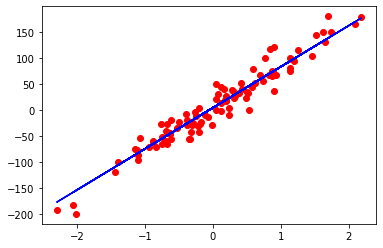

In [9]:
# plot

# prevent it from being tracked in computation graph, will make a new tensor with gradient tracking as false
predicted = model(X).detach()
plt.plot(X_np, Y_np, 'ro') # red dots
plt.plot(X_np, predicted, 'b') # blue
plt.show()
